In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [4]:
print(keras.__version__)
print(tf.__version__)

2.2.4-tf
1.13.1


## Data Preparation and Processing

In [5]:
train_labels =[]
train_samples = []

Example Data:
    1. Experimental drug tested on age 13 to 100.
    2. 2100 participants, Half under 65.
    3. 95% of aboave 65 have side effects
    4. 95% of below 65 have no side effect

In [6]:
for i in range(50):
    # 5% younger have side effect
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    # 5% Older have No side effect
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # 95% younger have No side effect
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    # 95% Older have side effect
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    

In [7]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_labels,train_samples = shuffle(train_labels,train_samples)

In [8]:

# Rescaling the model to get data range from 0 to 1
scaler = MinMaxScaler(feature_range = (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Simple tf.keras Sequential Model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num PUs Available: ",len(physical_devices))
tf.config.experiemntal.set_memeory_graowth(physical_devices[0],True)

AttributeError: module 'tensorflow' has no attribute 'config'

In [12]:
model = Sequential([
    Dense(units=16, input_shape=(1,),activation = 'relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2,activation = 'softmax')
    
])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# lr is learning_arate in newer versions

In [15]:
model.fit(x=scaled_train_samples,y=train_labels,batch_size=10,epochs=30,shuffle=True,verbose=1)
#verbose=output message 0,1,or 2

Epoch 1/30
2100/2100 [==============================] - 1s 293us/sample - loss: 0.6960 - acc: 0.4429
Epoch 2/30
2100/2100 [==============================] - 0s 162us/sample - loss: 0.6521 - acc: 0.5838
Epoch 3/30
2100/2100 [==============================] - 0s 162us/sample - loss: 0.6201 - acc: 0.6676
Epoch 4/30
2100/2100 [==============================] - 0s 159us/sample - loss: 0.5916 - acc: 0.7067
Epoch 5/30
2100/2100 [==============================] - 0s 158us/sample - loss: 0.5639 - acc: 0.7495
Epoch 6/30
2100/2100 [==============================] - 0s 159us/sample - loss: 0.5366 - acc: 0.7795
Epoch 7/30
2100/2100 [==============================] - 0s 161us/sample - loss: 0.5094 - acc: 0.8090
Epoch 8/30
2100/2100 [==============================] - 0s 160us/sample - loss: 0.4831 - acc: 0.8305
Epoch 9/30
2100/2100 [==============================] - 0s 161us/sample - loss: 0.4581 - acc: 0.8452
Epoch 10/30
2100/2100 [==============================] - 0s 159us/sample - loss: 0.4347 - a

In [16]:
model = Sequential([
    Dense(units=16, input_shape=(1,),activation = 'relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2,activation = 'softmax')
    
])

In [18]:
model.compile(optimizer=Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# lr is learning_arate in newer versions

In [19]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=1)
#validation split to set a certain percentage of data as validation
# validation is the last X percent and need to be shuffled before spliting

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 [==============================] - 0s 263us/sample - loss: 0.6609 - acc: 0.5714 - val_loss: 0.6332 - val_acc: 0.6810
Epoch 2/30
1890/1890 [==============================] - 0s 168us/sample - loss: 0.6370 - acc: 0.6577 - val_loss: 0.6053 - val_acc: 0.7429
Epoch 3/30
1890/1890 [==============================] - 0s 168us/sample - loss: 0.6126 - acc: 0.6979 - val_loss: 0.5786 - val_acc: 0.8190
Epoch 4/30
1890/1890 [==============================] - 0s 167us/sample - loss: 0.5857 - acc: 0.7503 - val_loss: 0.5517 - val_acc: 0.8476
Epoch 5/30
1890/1890 [==============================] - 0s 170us/sample - loss: 0.5580 - acc: 0.7831 - val_loss: 0.5215 - val_acc: 0.8619
Epoch 6/30
1890/1890 [==============================] - 0s 170us/sample - loss: 0.5294 - acc: 0.8021 - val_loss: 0.4952 - val_acc: 0.8762
Epoch 7/30
1890/1890 [==============================] - 0s 174us/sample - loss: 0.5004 - acc: 0.8354 - val_loss: 0.4652 - val

## Preprocess Test Data

In [20]:
test_labels =[]
test_samples = []

for i in range(50):
    # 5% younger have side effect
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    # 5% Older have No side effect
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # 95% younger have No side effect
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    # 95% Older have side effect
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
    

In [21]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_labels,test_samples = shuffle(test_labels,test_samples)
# Rescaling the model to get data range from 0 to 1
scaler = MinMaxScaler(feature_range = (0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Predict

In [22]:
predictions = model.predict (x=scaled_test_samples,batch_size=10,verbose=1)

2100/2100 [==============================] - 0s 48us/sample


In [23]:
for i in predictions:
    print(i)

[0.93407923 0.0659207 ]
[0.0846907  0.91530925]
[0.03020704 0.9697929 ]
[0.4043244 0.5956755]
[0.04841938 0.95158064]
[0.43675599 0.563244  ]
[0.04472321 0.9552767 ]
[0.9698424  0.03015759]
[0.25861514 0.74138486]
[0.05339    0.94661003]
[0.01902223 0.9809778 ]
[0.7703346  0.22966534]
[0.93407923 0.0659207 ]
[0.03530111 0.9646989 ]
[0.9155293  0.08447064]
[0.9514788  0.04852127]
[0.7459376  0.25406247]
[0.13563609 0.86436397]
[0.5362068  0.46379313]
[0.8333588  0.16664118]
[0.07517726 0.9248227 ]
[0.21090837 0.7890917 ]
[0.12076998 0.87923   ]
[0.13563609 0.86436397]
[0.9691463  0.03085363]
[0.25861514 0.74138486]
[0.9625862  0.03741379]
[0.07517726 0.9248227 ]
[0.43675599 0.563244  ]
[0.9666885  0.03331147]
[0.23391806 0.7660819 ]
[0.13563609 0.86436397]
[0.6014144 0.3985856]
[0.04841938 0.95158064]
[0.1520157  0.84798425]
[0.3421431  0.65785694]
[0.71989113 0.28010884]
[0.28495014 0.7150499 ]
[0.5691102  0.43088982]
[0.96590436 0.0340956 ]
[0.94891673 0.05108328]
[0.94622713 0.053772

In [24]:
round_predictions = np.argmax(predictions,axis=1)
print(round_predictions)

[0 1 1 ... 1 0 1]


## Confusion Matrix

In [25]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [26]:
cm = confusion_matrix(y_true=test_labels,y_pred=round_predictions)
print(cm)

[[ 985   65]
 [  48 1002]]


In [29]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    # This plot prints and plots the confusion matric. Normalization can eb applied by setting'normalize=True'
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, Without Normalization')
        
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]> thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion Matrix, Without Normalization
[[ 985   65]
 [  48 1002]]


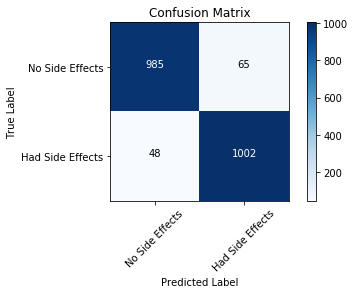

In [30]:
cm_plot_labels = ['No Side Effects','Had Side Effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

## Save and Load a Model

In [31]:
import os.path
model.save('medical-trail_model.h5')

## Load a Model

In [32]:
from tensorflow.keras.models import load_model
new_model = load_model('medical-trail_model.h5')

In [33]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [34]:
new_model.get_weights()

[array([[ 0.6261425 , -0.34692103, -0.32515335, -0.01348937, -0.15204346,
          0.64710414,  0.38174027, -0.17828786, -0.42106634, -0.4986924 ,
         -0.10067499, -0.08637784, -0.16574478, -0.35806355, -0.06771678,
          0.7151566 ]], dtype=float32),
 array([-0.12914261,  0.        ,  0.        ,  0.        ,  0.1733765 ,
        -0.07813086, -0.07586155,  0.        ,  0.        ,  0.        ,
         0.        ,  0.14576103,  0.        ,  0.        ,  0.        ,
        -0.05472807], dtype=float32),
 array([[-3.02964717e-01,  3.51477414e-01,  5.22683859e-01,
         -9.21491981e-02, -4.81805205e-02, -3.00666690e-03,
         -4.67774570e-01,  3.74085516e-01, -4.73766178e-02,
          3.15913945e-01, -1.24977820e-01,  2.79538870e-01,
          2.59915024e-01, -5.21237135e-01, -4.99606252e-01,
         -1.89257383e-01,  4.56783652e-01,  3.03869545e-01,
          6.13406710e-02,  4.43594843e-01, -1.45528138e-01,
         -2.04756796e-01,  1.18360914e-01,  3.80548865e-01,
 

In [35]:
new_model.optimizer

## Save model to JSON

In [36]:
# Save as JSON
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": n

In [37]:
# Save as YAML
yaml_string=model.to_yaml()
yaml_string

'backend: tensorflow\nclass_name: Sequential\nconfig:\n  layers:\n  - class_name: Dense\n    config:\n      activation: relu\n      activity_regularizer: null\n      batch_input_shape: !!python/tuple\n      - null\n      - 1\n      bias_constraint: null\n      bias_initializer:\n        class_name: Zeros\n        config:\n          dtype: float32\n      bias_regularizer: null\n      dtype: float32\n      kernel_constraint: null\n      kernel_initializer:\n        class_name: GlorotUniform\n        config:\n          dtype: float32\n          seed: null\n      kernel_regularizer: null\n      name: dense_3\n      trainable: true\n      units: 16\n      use_bias: true\n  - class_name: Dense\n    config:\n      activation: relu\n      activity_regularizer: null\n      bias_constraint: null\n      bias_initializer:\n        class_name: Zeros\n        config:\n          dtype: float32\n      bias_regularizer: null\n      dtype: float32\n      kernel_constraint: null\n      kernel_initializer

In [38]:
from tensorflow.keras.models import model_from_json
model_architechture = model_from_json(json_string)
model_architechture.summary()
# Model needs to be retrained

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.save_weights('my_medical-trail_weights.h5')

In [39]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,),activation = 'relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2,activation = 'softmax')
    
])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [42]:
model2.load_weights('my_medical-trail_weights.h5')

In [43]:
model2.get_weights()

[array([[ 0.6261425 , -0.34692103, -0.32515335, -0.01348937, -0.15204346,
          0.64710414,  0.38174027, -0.17828786, -0.42106634, -0.4986924 ,
         -0.10067499, -0.08637784, -0.16574478, -0.35806355, -0.06771678,
          0.7151566 ]], dtype=float32),
 array([-0.12914261,  0.        ,  0.        ,  0.        ,  0.1733765 ,
        -0.07813086, -0.07586155,  0.        ,  0.        ,  0.        ,
         0.        ,  0.14576103,  0.        ,  0.        ,  0.        ,
        -0.05472807], dtype=float32),
 array([[-3.02964717e-01,  3.51477414e-01,  5.22683859e-01,
         -9.21491981e-02, -4.81805205e-02, -3.00666690e-03,
         -4.67774570e-01,  3.74085516e-01, -4.73766178e-02,
          3.15913945e-01, -1.24977820e-01,  2.79538870e-01,
          2.59915024e-01, -5.21237135e-01, -4.99606252e-01,
         -1.89257383e-01,  4.56783652e-01,  3.03869545e-01,
          6.13406710e-02,  4.43594843e-01, -1.45528138e-01,
         -2.04756796e-01,  1.18360914e-01,  3.80548865e-01,
 